<a href="https://colab.research.google.com/github/zeynebe/Zeynebe/blob/main/Insurance_cost_project_ipynb_adl%C4%B1_not_defterinin_kopyas%C4%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing libraries and models

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.svm import SVR

In [ ]:
# importing, unzipping the file

In [ ]:
# defining the dataset, dataframe and looking at the data

In [ ]:
dataset = pd.read_csv("/content/sample_data/insurance.csv")
df = dataset.copy()
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Exploratory Data Analysis

 - what kind of data / how will we treat different types of data
 - is there missing data / what will we do about it
 - are there outliers / where are they
 - how to add, remove or change features to get more out of data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
# to see whether the data has missing values

df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
# to get a statistical summary of the numeric data

df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


DATA VISUALIZATION

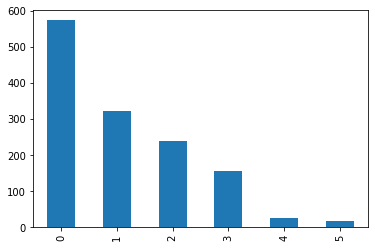

In [ ]:
# Analyzing the number of children

# plt.figure(figsize=(10,7))
df["children"].value_counts().plot.bar()

In [ ]:
# to see the percentage of sex
df["sex"].value_counts()

male      676
female    662
Name: sex, dtype: int64

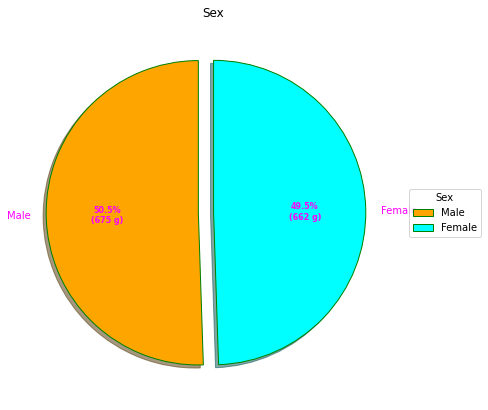

In [ ]:
fig, ax = plt.subplots(figsize=(10,7))

sex = ["Male", "Female"]

data = list(df["sex"].value_counts().values)

# creating explode data
explode = (0.1, 0.0)

# defining color parameters
colors = ("orange", "cyan")

# Wedge properties
wp = {"linewidth":1, "edgecolor": "green"}

def func(pct, allvalues):
    absolute = int(pct/100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)


wedges, texts, autotexts = ax.pie(data,
                                  autopct = lambda pct: func(pct, data),
                                  explode = explode,
                                  labels = sex,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color= "magenta"))
ax.legend(wedges, sex,
          title = "Sex",
          loc = "center left",
          bbox_to_anchor = (1, 0, 0.5, 1))
    
plt.setp(autotexts, size=8, weight="bold")
ax.set_title("Sex")

plt.show()

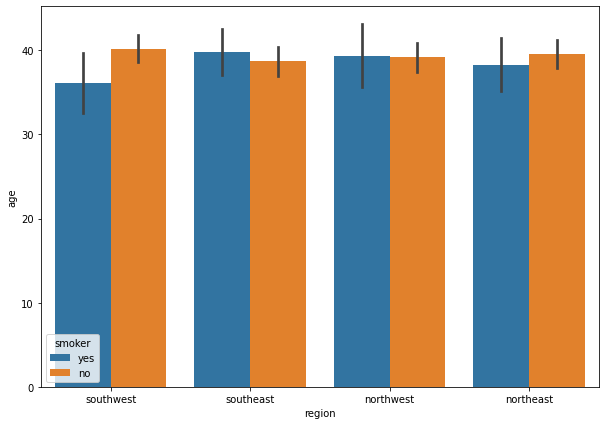

In [ ]:
# to see which state has the most smoker
plt.figure(figsize=(10,7))

sns.barplot(x="region", y="age", hue="smoker", data=df)

Preprocessing

Dealing with categorical attributes

1. Label Encoding

In [ ]:
def label_encoding(column_name):
  # label_encoder = LabelEncoder()
  df[column_name] = LabelEncoder().fit_transform(df[column_name])

In [ ]:
label_encoding("smoker")
label_encoding("sex")

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


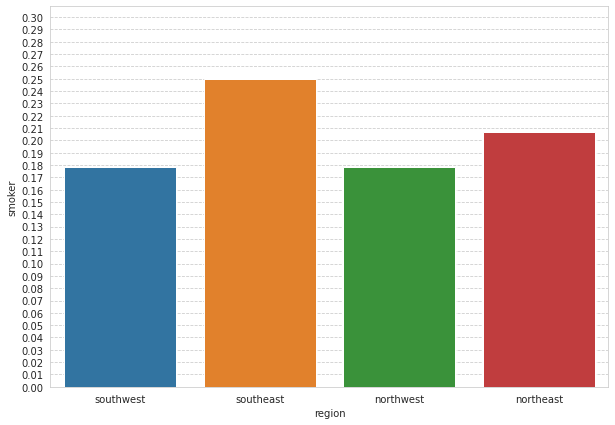

In [ ]:
# to see which state has the most smoker after LabelEncoding

import matplotlib.ticker as ticker

plt.figure(figsize=(10,7))
graph = sns.barplot(x="region", y="smoker", errwidth=0, data=df)
graph.yaxis.set_major_locator(ticker.MultipleLocator(0.01))

Note: we cannot apply label encoding to the region data since it is a categorical attribute. if we do so it will resemble the "number of children" data and the increase in numbers will have an additional meaning. however, in this case all regions should be treated equally.

Instead we will use 

ONE-HOT ENCODING

In [ ]:
one_hot = pd.get_dummies(df["region"])
one_hot.head()

,northeast,northwest,southeast,southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0


In [ ]:
df = pd.concat([df, one_hot], axis=1) #datasetimizi one_hot dataseti ile birleştiriyoruz. 
# axis=1'i ise sutün bazında birleştirdiğimiz için belirtiyoruz
df.drop("region", axis=1, inplace=True) #region sutünumuzu verisetimizden çıkarıyoruz
df.head() #now all our data is numerical

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


SPLITTING DATASET

In [ ]:
X = df.drop("charges", axis=1)
y = df["charges"]

FEATURE SCALING
there are 2 types of feature scaling
- Normalization: (also called min-max scaling) resclaes all numerical values btwn 0 and 1. you can do it with scikit-learn's MinMaxScalar class
- Standartization: substracts the mean value from all the features (so the resulting features have 0 mean). than it scales the features to unit variance (by dividing the features with their standard deviation). Scikit-Learn provides StandardScalar class to do this. 

In [ ]:
scalar = MinMaxScaler()
X = scalar.fit_transform(X)
X[0:5] #ilk 5 satırına bakalım veri setimizin

array([[0.02173913, 0.        , 0.3212268 , 0.        , 1.        ,
        0.        , 0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.47914985, 0.2       , 0.        ,
        0.        , 0.        , 1.        , 0.        ],
       [0.2173913 , 1.        , 0.45843422, 0.6       , 0.        ,
        0.        , 0.        , 1.        , 0.        ],
       [0.32608696, 1.        , 0.18146355, 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        ],
       [0.30434783, 1.        , 0.34759214, 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        ]])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(f"""
Shape of X Train: {X_train.shape}
Shape of y Train: {y_train.shape}
Shape of X Test: {X_test.shape}
Shape of y Test: {y_test.shape}""")


Shape of X Train: (1070, 9)
Shape of y Train: (1070,)
Shape of X Test: (268, 9)
Shape of y Test: (268,)


MODEL SELECTION

In [ ]:
linreg = LinearRegression()
DecTree = DecisionTreeRegressor()
RandForest = RandomForestRegressor()
SVM = SVR()

Cross Validation is an evaluation metric which takes in model, X, y, number of k (folds of cross validation and scoring parameter).

Cross Validation aims to solve the problem of not training on all the data at once. So, it creates k models and we end up having a model trained on all data seperately with k batches 

In [ ]:
#neden scoring (altta 6.satırda) "neg_mean_squared_error" negatif olarak "neg"kullandık.
# Çünkü normalde hata yüksek ise olumsuz bir durum. bu durumda 
# (-) işaretini dikkate almazsan rakam ne kadar yüksek ise model performansı o kadar iyi demek
linreg_scores = cross_val_score(linreg,
                                X_train, y_train,
                                scoring="neg_mean_squared_error",
                                cv=10)

In [ ]:
linreg_scores

array([-36935397.24633981, -43307871.90469339, -27392943.33594101,
       -36545076.53517248, -34064321.21101744, -37545462.85261907,
       -53003844.65025207, -39666927.56171686, -38357145.09175086,
       -32042446.75311643])

In [ ]:
DecTree_scores = cross_val_score(DecTree,
                                 X_train, y_train,
                                 scoring="neg_mean_squared_error",
                                 cv=10)

In [ ]:
RandForest_scores = cross_val_score(RandForest,
                                    X_train, y_train,
                                    scoring="neg_mean_squared_error",
                                    cv=10)

In [ ]:
SVM_scores = cross_val_score(SVM,
                             X_train, y_train,
                             scoring="neg_mean_squared_error",
                             cv=10)

In [ ]:
# Let's write a function to display Regression Evaluation metrics

def score_display(scores):
  scores = np.sqrt(-scores)
  print(f"""
  RMSE Scores: {scores}
  Mean: {scores.mean()}
  Standart Deviation: {scores.std()}
  """)

In [ ]:
score_display(linreg_scores)


  RMSE Scores: [6077.44989665 6580.87166754 5233.82683473 6045.25239632 5836.4647871
 6127.43525895 7280.37393616 6298.16858791 6193.3145481  5660.60480453]
  Mean: 6133.376271799343
  Standart Deviation: 517.5318567882914
  


In [ ]:
score_display(DecTree_scores)


  RMSE Scores: [6309.66594281 6488.22811874 6869.12811476 7503.94843971 6991.95522077
 6363.06372894 7676.6632089  6216.26042192 7068.86174059 5358.38698653]
  Mean: 6684.616192365761
  Standart Deviation: 647.4876191645777
  


In [ ]:
score_display(RandForest_scores)


  RMSE Scores: [4821.63520118 5270.97720483 3987.52671352 4491.3493378  5268.30124581
 4937.70145683 5604.19916786 5328.84658485 5129.8847037  4666.76704791]
  Mean: 4950.718866429105
  Standart Deviation: 451.8585632853226
  


In [ ]:
score_display(SVM_scores)


  RMSE Scores: [12527.55657891 12477.53529947 12822.95627471 14495.04256846
 13002.65880912 10418.83021956 12320.74963324 12153.30642099
 12935.57208746 12258.97310757]
  Mean: 12541.318099949585
  Standart Deviation: 951.4602172803403
  


RandomForestRegressor has the lowest RMSE (Root Mean Squared Error). Therefore, we will continue with that

PARAMETER TUNING
bunun için seçtiğin model ismiyle google da search ettiğinde örneğin random forest params diye hangi parametreleri olduğunu nasıl değiştirebileceğini görebilirsin.

In [ ]:
params = {"n_estimators": [3, 10, 20, 50],
          "n_jobs": [2, 3, 4, 10]}

In [ ]:
grid_s = GridSearchCV(RandForest, params,
                      cv=5,
                      scoring="neg_mean_squared_error")

In [ ]:
grid_s.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'n_estimators': [3, 10, 20, 50],
                         'n_jobs': [2, 3, 4, 10]},
             scoring='neg_mean_squared_error')

In [ ]:
grid_s.best_params_

{'n_estimators': 50, 'n_jobs': 4}

as you can see with 50 n_estimtors and 4 n_jobs we get the best values. so you can try higher numbers if you wish

to see the root mean square error and the parameters we will write the code below

In [ ]:
for mean_score, params in zip((grid_s.cv_results_["mean_test_score"]),
                              (grid_s.cv_results_["params"])):
    print(np.sqrt(-mean_score), "      ", params);

5583.817126212699        {'n_estimators': 3, 'n_jobs': 2}
5683.679113378763        {'n_estimators': 3, 'n_jobs': 3}
5485.971211254515        {'n_estimators': 3, 'n_jobs': 4}
5608.087551792494        {'n_estimators': 3, 'n_jobs': 10}
5163.813922112442        {'n_estimators': 10, 'n_jobs': 2}
5110.03514584867        {'n_estimators': 10, 'n_jobs': 3}
5075.58538355715        {'n_estimators': 10, 'n_jobs': 4}
5116.981979367617        {'n_estimators': 10, 'n_jobs': 10}
5001.146216390419        {'n_estimators': 20, 'n_jobs': 2}
5041.670535856085        {'n_estimators': 20, 'n_jobs': 3}
4960.508929317497        {'n_estimators': 20, 'n_jobs': 4}
5009.611465269809        {'n_estimators': 20, 'n_jobs': 10}
4933.671247051036        {'n_estimators': 50, 'n_jobs': 2}
4997.787053645609        {'n_estimators': 50, 'n_jobs': 3}
4908.094151961215        {'n_estimators': 50, 'n_jobs': 4}
4962.394044417317        {'n_estimators': 50, 'n_jobs': 10}


PREDICTION

In [ ]:
predictions = grid_s.best_estimator_.predict(X_test)

In [ ]:
y_test[0:10].values

array([ 9095.06825,  5272.1758 , 29330.98315,  9301.89355, 33750.2918 ,
        4536.259  ,  2117.33885, 14210.53595,  3732.6251 , 10264.4421 ])

In [ ]:
comparison = pd.DataFrame({"Y test": y_test[0:10].values,
                           "Predictions": predictions[0:10]})

comparison

,Y test,Predictions
0,9095.06825,11278.169123
1,5272.17580,5100.649859
2,29330.98315,28007.741798
3,9301.89355,12557.125455
4,33750.29180,34493.585428
5,4536.25900,8711.880637
6,2117.33885,2554.587520
7,14210.53595,14235.701674
8,3732.62510,5470.574186
9,10264.44210,12236.286482


Some values look close to each other but there are a few that differ a lot. We cannot understand how good our model works by looking at the outcomes. we need to EVALUATE our model.

EVALUATION

In this example we will use r-squared, Mean Squared Error (MSE), Mean Absolute Error (MAE). you can try other evaluation techniques and see their results as well

In [ ]:
def regression_evaluation(preds):
  mse = mean_squared_error(y_test, preds)
  rmse = np.sqrt(mse)
  r_squared = r2_score(y_test, preds)
  mae = mean_absolute_error(y_test, preds)

  print(f"Mean Absolute Error: {mae} \nMean Squared Error: {mse} \nRoot Mean Squared Error: {rmse} \nR Squared Value: {r_squared}")

In [ ]:
regression_evaluation(predictions)

Mean Absolute Error: 2524.906801322263 
Mean Squared Error: 21342931.277207762 
Root Mean Squared Error: 4619.841044582353 
R Squared Value: 0.8625242791221215


Finding the Confidence Interval of %95

 confidence intervals are intervals in which we have a certain confidence to find the real value of the observations we measure.
 scietists usually search for the values for the %95 confidence interval

In [ ]:
from scipy import stats

confidence = 0.95
squared_errors = (predictions - y_test)**2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
        loc=squared_errors.mean(),
        scale=stats.sem(squared_errors)))

array([3676.97941759, 5400.52635556])

so our model can predict with the error values between 3676 and 5400 